## 6.3 손글씨 이미지 분류

## #1. 학습 데이터 준비

다층 퍼셉트론을 사용해 손글씨 이미지 분류 모형을 만들어본다.<br/>
이번에 사용할 데이터는 지난번과는 달리 표 형식이 아니라 이미지(픽셀값)형식으로 돼 있다.

In [1]:
# PyTorch 라이브러리 임포트

import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# scikit-learn 라이브러리 임포트
from sklearn.datasets import load_digits
from sklearn import datasets, model_selection

# pandas 라이브러리 임포트
import pandas as pd

# matplotlib 라이브러리 임포트
from matplotlib import pyplot as plt
from matplotlib import cm
%matplotlib inline  # 이미지를 주피터 노트북 안에 출력하도록 함

UsageError: unrecognized arguments: # 이미지를 주피터 노트북 안에 출력하도록 함


In [2]:
# MNIST 데이터를 읽어 들인 다음, 화면에 출력
# mnist = datasets.fetch_mldata('MNIST original', data_home='./data/')

In [3]:
mnist = datasets.fetch_openml('mnist_784', data_home='./data/')

In [4]:
# mnist

mnist에는 다음과 같은 필드가 있다.
* COL_NAMES: 데이터 집합의 각 칼럼명
* DESCR: 데이터 집합 설명
* data: 손글씨 이미지 필셀값
* target: 손글씨 이미지 숫자 레이블

MNIST 데이터 집합은 설명 변수인 784개의 픽셀값과 해당 이미지가 나타내는 숫자 레이블의 쌍으로 구성된다

In [5]:
# 설명변수를 정규화하고 변수에 대입하고 화면에 출력
mnist_data = mnist.data / 255

# 데이터프레임 객체로 변환하고 화면에 출력
pd.DataFrame(mnist_data)  # numpy 배열은 한 눈에 파악하기 어려움으로 판다스 데이터프레임 객체로 변환한다

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


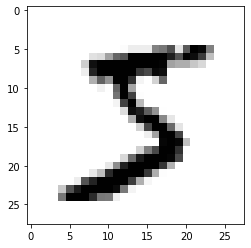

In [6]:
# 1번 째 이미지를 화면에 출력

plt.imshow(mnist_data[0].reshape(28, 28), cmap=cm.gray_r)
plt.show()

## #2. Data Preprocessing I
* Train_Test_Split()
* 종속변수 데이터 타입 변경하기

Malimg 데이터 또한 마찬가지로 이미지 출력을 할 수 있겠구나

In [8]:
# 목적변수를 변수에 할당하고 데이터를 화면에 출력

mnist_label = mnist.target
mnist_label

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

### train_test_split()

In [9]:
# 훈련 데이터 건수
train_size = 5000
# 테스트 데이터 건수
test_size = 500

# 데이터 집합을 훈련 데이터와 테스트 데이터로 분할

train_X, test_X, train_Y, test_Y = model_selection.train_test_split(
mnist_data, mnist_label, train_size=train_size, test_size=test_size)

In [10]:
print(type(train_Y))

<class 'numpy.ndarray'>


### MNIST 데이터 종속변수 data type 변경하기
별도의 전처리 과정 없이 데이터를 그대로 사용할 경우, Tensor로 변형이 되지 않으니 종속변수의 타입을 지정해준다.<br/>
train_Y, test_Y의 데이터 타입을 float32로 변경해준다.

In [11]:
import numpy as np
train_Y.astype(np.float32)

array([1., 2., 7., ..., 0., 7., 1.], dtype=float32)

In [14]:
train_Y = train_Y.astype(np.float32)
train_Y

array([1., 2., 7., ..., 0., 7., 1.], dtype=float32)

In [15]:
test_Y = test_Y.astype(np.float32)
test_Y

array([1., 2., 2., 2., 8., 4., 6., 2., 9., 3., 9., 1., 2., 1., 8., 1., 0.,
       5., 9., 9., 3., 9., 2., 9., 9., 4., 7., 1., 0., 5., 9., 4., 3., 1.,
       8., 6., 2., 7., 2., 5., 1., 0., 1., 6., 9., 3., 3., 2., 5., 9., 3.,
       9., 0., 7., 0., 4., 9., 1., 4., 9., 6., 7., 0., 5., 8., 7., 3., 7.,
       5., 8., 5., 5., 2., 7., 9., 3., 3., 5., 6., 5., 8., 8., 2., 7., 6.,
       7., 0., 2., 2., 2., 8., 2., 2., 6., 3., 2., 9., 6., 4., 4., 4., 5.,
       2., 4., 6., 4., 5., 3., 2., 7., 9., 2., 4., 0., 7., 4., 3., 0., 2.,
       7., 4., 6., 6., 8., 7., 9., 3., 1., 9., 6., 4., 4., 9., 1., 0., 0.,
       3., 3., 6., 3., 1., 3., 9., 2., 3., 7., 7., 3., 2., 9., 1., 0., 6.,
       6., 1., 8., 0., 3., 2., 4., 3., 7., 9., 1., 7., 4., 4., 2., 6., 0.,
       4., 8., 6., 0., 7., 8., 9., 8., 0., 4., 8., 7., 4., 3., 7., 2., 3.,
       8., 9., 0., 3., 7., 4., 4., 5., 1., 4., 1., 3., 4., 6., 0., 3., 4.,
       9., 9., 2., 9., 5., 6., 8., 6., 3., 1., 9., 4., 7., 3., 1., 8., 5.,
       6., 5., 4., 5., 2.

## #3. 텐서 생성

* 텐서 생성
    * 훈련 데이터
    * 테스트 데이터
* 설명변수와 목적변수 합치기
* 데이터 로더

In [16]:
# 훈련 데이터 텐서 변환
train_X = torch.from_numpy(train_X).float()
train_Y = torch.from_numpy(train_Y).long()

# 테스트 데이터 텐서 변환
test_X = torch.from_numpy(test_X).float()
test_Y = torch.from_numpy(test_Y).long()

# 변환된 텐서의 형상 확인
print(train_X.shape)
print(train_Y.shape)

torch.Size([5000, 784])
torch.Size([5000])


준비가 끝난 데이터를 파이토치가 다룰 수 있는 형태로 정리해준다.
NumPy Data를 Torch로 변형해주었다.

### 설명변수와 목적변수 텐서를 합친다

In [18]:
from torch.utils.data import TensorDataset, DataLoader

# 설명변수와 목적변수 텐서를 합친다
train = TensorDataset(train_X, train_Y)

# 텐서의 첫 번째 데이터를 확인
print(train[0])

# 미니배치 분할
train_loader = DataLoader(train, batch_size=100, shuffle=True)


(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000,

In [20]:
print(train[0][1])


tensor(1)


## #4. 신경망 구성

In [24]:
# 신경망 구성
class Net(nn.Module):  # 모든 신경망의 기본이 되는 클래스이다. 이 클래스 안에 각 층과 함수, 신경망의 구조를 정의한다.
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 256)
        self.fc3 = nn.Linear(256, 256)
        self.fc4 = nn.Linear(256, 128)
        self.fc5 = nn.Linear(128, 128)
        self.fc6 = nn.Linear(128, 10)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = self.fc6(x)
        return F.log_softmax(x)
    
# 인스턴스 생성
model = Net()

# 오차 함수 객체
criterion = nn.CrossEntropyLoss()

# 최적화를 담당할 객체
optimizer = optim.SGD(model.parameters(), lr=0.01)

# 학습 시작
for epoch in range(1000):
    total_loss = 0
    # 분할해 둔 데이터를 꺼내온다.
    for train_x, train_y in train_loader:
        # 계산 그래프 구성
        train_x, train_y = Variable(train_x), Variable(train_y)
        # 경사 초기화
        optimizer.zero_grad()
        # 순전파 계산
        output = model(train_x)
        # 오차 계샨
        loss = criterion(output, train_y)
        # 역전파 계산
        loss.backward()
        # 가중치 업데이트
        optimizer.step()
        # 누적 오차 계산
        total_loss += loss.data
        
    # 100회마다 누적오차 출력
    if (epoch+1) % 100 == 0:
        print('Epoch: ',epoch+1,'Total loss: ', total_loss)
        
    

C:\Users\stevelee\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch:  100 Total loss:  tensor(39.0086)
Epoch:  200 Total loss:  tensor(1.2431)
Epoch:  300 Total loss:  tensor(0.1321)
Epoch:  400 Total loss:  tensor(0.0548)
Epoch:  500 Total loss:  tensor(0.0321)
Epoch:  600 Total loss:  tensor(0.0220)
Epoch:  700 Total loss:  tensor(0.0164)
Epoch:  800 Total loss:  tensor(0.0129)
Epoch:  900 Total loss:  tensor(0.0106)
Epoch:  1000 Total loss:  tensor(0.0089)


## #6. Accuracy Test

In [25]:
# 계산 그래프 구성
test_x, test_y = Variable(test_X), Variable(test_Y)

# 출력이 0 또는  1이 되게 함
result = torch.max(model(test_x).data, 1)[1]

# 모형의 정확도 측정
accuracy = sum(test_y.data.numpy() == result.numpy()) / len(test_y.data.numpy())

# 모형의 정확도 출력
accuracy

C:\Users\stevelee\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


0.908

In [ ]:
kj